In [ ]:
!pip  install --user gcrnet
# If you are running this notebook on Google Colab, please reset the current python environment via 'Runtime -> Restart runtime' after installation.

In [2]:
from gcrnet.utils import simulate_bivariate_cox_data
from gcrnet import GCRNet
import numpy as np
import pandas as pd
import torch

## Prepare dataset

In [3]:
train_data=simulate_bivariate_cox_data(n_samples=500, n_features=20, scale=2, shape=2,  case="NL1", censoring_rate=0.2)
test_data=simulate_bivariate_cox_data(n_samples=500, n_features=20, scale=2, shape=2,  case="NL1", censoring_rate=0.2)

## Standardize dataset 

In [4]:
# standardize dataset in real application
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Fit the scaler on the training data
# scaler.fit(train_data['X'])
# train_data['X'] = scaler.fit_transform(train_data['X'])
# test_data['X'] = scaler.fit_transform(test_data['X'])

## Instantiate the GCRNet trainer

In [5]:
lam=np.exp(np.linspace(np.log(0.001),np.log(0.5), 50))
gmcp_net = GCRNet(task_type='bivariate-cox',device=torch.device("cpu"), input_dim=train_data['X'].shape[1], hidden_dims=[10,5], activation="relu",
    optimizer="Adam",learning_rate=0.001, batch_size=train_data['X'].shape[0], 
    alpha=0.01, lam=lam, penalty="MCP",drop_input=True)

## Train model

In [6]:
#param_grid={'alpha':np.exp(np.linspace(np.log(1),np.log(5), 10))}
param_grid={'alpha':[0.001]}
gmcp_net= gmcp_net.fit_and_validate(X=train_data['X'], 
y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T'],'E2': train_data['E2'], 'T2': train_data['T2']}), 
                              param_grid=param_grid, num_epochs=200, verbose=True, print_interval=200)

Epoch: 200: loss=9.047056336975098
Epoch: 400: loss=7.487371583557129
Epoch: 600: loss=6.551273007965088
Epoch: 800: loss=5.972920556640625
Epoch: 1000: loss=5.589384694671631
Epoch: 1200: loss=5.426714559173584
Epoch: 1400: loss=5.321242471313477
Epoch: 1600: loss=5.253051896667481
Epoch: 1800: loss=5.19331993637085
Epoch: 2000: loss=5.115256925201416
Lambda0=0.0010000000000000002, size=20
Epoch: 200: loss=5.073852824211607
Lambda1=0.0011352225791695506, size=20
Epoch: 200: loss=5.052611256830804
Lambda2=0.0012887303042563671, size=20
Epoch: 200: loss=5.041532131096187
Lambda3=0.0014629957398518724, size=20
Epoch: 200: loss=5.028350256861849
Lambda4=0.001660825797108707, size=20
Epoch: 200: loss=5.0226754772213775
Lambda5=0.0018854069449450721, size=20
Epoch: 200: loss=5.01465053112645
Lambda6=0.002140356534824727, size=20
Epoch: 200: loss=4.998380062541943
Lambda7=0.002429781065806128, size=20
Epoch: 200: loss=4.990764450407478
Lambda8=0.002758342328341774, size=20
Epoch: 200: loss=4

## Solution path

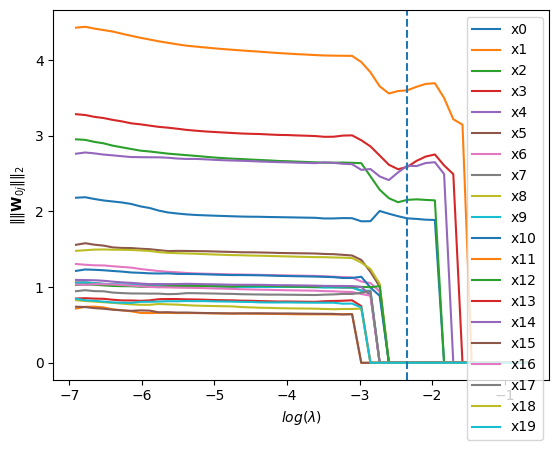

(array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]), Parameter containing:
tensor([[-0.3991, -1.3695,  0.1432,  0.1410,  0.3600],
        [-0.4865, -0.9768, -0.5955,  0.6712,  0.5241],
        [-0.1326, -0.2584, -0.5159, -0.8109, -1.0160],
        [ 0.6214,  1.1721, -0.0270,  0.4818,  0.3122],
        [ 0.3148,  0.6160,  0.7474, -0.2260, -0.2643],
        [-0.6306,  0.0988, -0.0337,  0.7719, -0.9940],
        [ 0.2287,  0.9937, -0.5395, -0.0182, -0.1005],
        [ 0.2343,  0.8148,  0.1252,  0.5180,  0.5520],
        [-0.3267, -0.0145,  0.0594, -1.0644,  1.0804],
        [-0.2591, -0.9693,  0.4653, -0.0112, -0.3321],
        [-0.1795, -0.2437,  0.6344,  0.4786, -0.0263],
        [-0.3639,  0.9517,  0.5816,  0.4255,  0.3654],
        [ 1.0082,  0.4298,  0.4606,  0.4959,  0.4430],
        [ 0.3077,  0.4890, -0.3803,  0.7703, -1.0435],
        [-0.1383, -0.0278, -0.0149,  0.9557,

In [7]:
gmcp_net.plot_solution_path(legend=True, best=True)
print(gmcp_net.get_selection())
print(f'best_lam={gmcp_net.lam[gmcp_net.best_lam_ind]}, best_params={gmcp_net.best_params}')

## Evaluating the model

In [8]:
CI_train = gmcp_net.score(X=train_data['X'], y=pd.DataFrame({'E': train_data['E'], 'T': train_data['T'],
'E2': train_data['E2'], 'T2': train_data['T2']}), best=True)
CI_test=gmcp_net.score(X=test_data['X'], y=pd.DataFrame({'E': test_data['E'], 'T': test_data['T'],
'E2': test_data['E2'], 'T2': test_data['T2']}), best=True)
print(f'train_CI={CI_train} test_CI={CI_test}')

train_CI=(0.948273951628338, 0.941652993199385) test_CI=(0.9408137467498433, 0.9286967045815855)
